In [1]:
# https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
# https://matplotlib.org/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [2]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

## Load data

In [3]:
BASE_FOLDER = Path('../data')
RANDOM_STATE = 42
NEG_RATE = 1

In [4]:
def get_csv(session, split):
    return 'zju_gaitaccel_session_' + str(session) + '_' + str(split) + '.csv'

In [5]:
df_s0_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(0, 128))), header=None)
df_s1_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(1, 128))), header=None)
df_s2_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(2, 128))), header=None)

In [6]:
select_classes = ['u%03d' % i for i in range(1, 5)]
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
y = df[df.columns[-1]].values
y = LabelEncoder().fit_transform(y) + 1
X = df.drop([df.columns[-1]], axis=1)

In [7]:
X.shape, y.shape

((212, 59), (212,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [9]:
select_classes = ['u%03d' % i for i in range(5, 154)]
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
df = df.sample(n=X.shape[0] * NEG_RATE, random_state=RANDOM_STATE)
y_neg = np.zeros((X.shape[0] * NEG_RATE,))
X_neg = df.drop([df.columns[-1]], axis=1)

In [10]:
X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2, random_state=RANDOM_STATE)

In [11]:
X_neg_train.shape, y_neg_train.shape

((169, 59), (169,))

In [12]:
X_full_train = np.concatenate((X_train, X_neg_train), axis=0)
y_full_train = np.concatenate((y_train, y_neg_train), axis=0).astype(int)
X_full_test = np.concatenate((X_test, X_neg_test), axis=0)
y_full_test = np.concatenate((y_test, y_neg_test), axis=0).astype(int)

In [57]:
label_df = pd.DataFrame(data=y_full_train)
print(label_df[0].value_counts())

0     427
8      53
4      51
7      48
9      47
6      44
3      44
10     37
5      37
2      34
1      32
Name: 0, dtype: int64


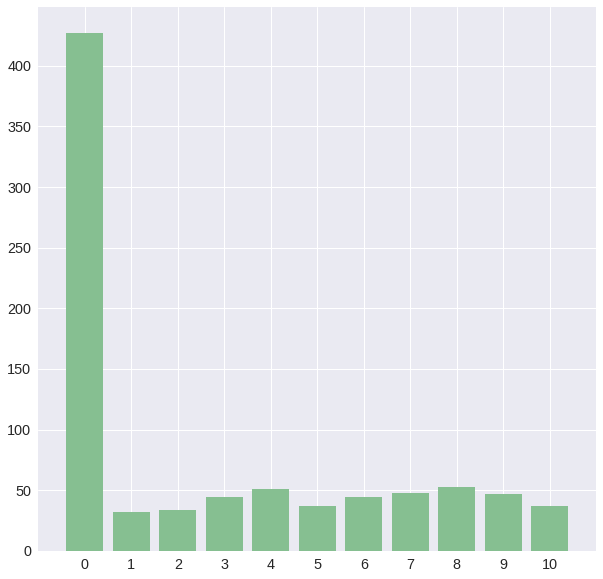

In [58]:
counts = np.bincount(y_full_train)
fig, ax = plt.subplots()
ax.bar(range(11), counts, width=0.8, align='center', color='#86bf91')
ax.set(xticks=range(11), xlim=[-1, 11])

plt.show()

In [59]:
from sklearn.svm import SVC

In [60]:
clf = SVC(gamma='auto', C=100)
clf.fit(X_full_train, y_full_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
clf.score(X_full_test, y_full_test)

0.822429906542056

In [62]:
label_df = pd.DataFrame(data=y_full_test)
print(label_df[0].value_counts())

0     107
2      18
10     12
1      12
7      11
4      11
8      10
3      10
5       9
9       7
6       7
Name: 0, dtype: int64


In [63]:
label_df = pd.DataFrame(data=clf.predict(X_full_test))
print(label_df[0].value_counts())

0     128
7      13
10     11
3      11
1      11
8       9
5       8
2       8
9       7
6       6
4       2
Name: 0, dtype: int64


## Binary classification

In [64]:
y_bin_train = y_full_train.copy()
y_bin_train[y_bin_train < 10] = 0
y_bin_train[y_bin_train == 10] = 1

In [65]:
y_bin_test = y_full_test.copy()
y_bin_test[y_bin_test < 10] = 0
y_bin_test[y_bin_test == 10] = 1

In [66]:
label_df = pd.DataFrame(data=y_bin_train)
print(label_df[0].value_counts())

0    817
1     37
Name: 0, dtype: int64


In [67]:
clf = SVC(gamma='auto', C=100)
clf.fit(X_full_train, y_bin_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
clf.score(X_full_test, y_bin_test)

0.9766355140186916

## 59 features

In [55]:
def scale_df(df):
    X = df.drop([df.columns[-1]], axis=1)
    df[df.columns[:-1]] = scale(X)
    return df

In [56]:
BASE_FOLDER = Path('../data')
RANDOM_STATE = 42
NEG_RATE = 3

In [57]:
def get_feat_csv(session):
    return 'zju_gaitaccel_session_' + str(session) + '_128.csv'

In [58]:
df_s0_128 = scale_df(pd.read_csv(BASE_FOLDER.joinpath(Path(get_feat_csv(0))), header=None))
df_s1_128 = scale_df(pd.read_csv(BASE_FOLDER.joinpath(Path(get_feat_csv(1))), header=None))
df_s2_128 = scale_df(pd.read_csv(BASE_FOLDER.joinpath(Path(get_feat_csv(2))), header=None))

In [59]:
select_classes = ['u%03d' % i for i in range(1, 6)]
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
y = df[df.columns[-1]].values
y = LabelEncoder().fit_transform(y) + 1
X = df.drop([df.columns[-1]], axis=1)

select_classes = ['u%03d' % i for i in range(6, 154)]
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
df = df.sample(n=X.shape[0] * NEG_RATE, random_state=RANDOM_STATE)
y_neg = np.zeros((X.shape[0] * NEG_RATE,))
X_neg = df.drop([df.columns[-1]], axis=1)

X_full = np.concatenate((X, X_neg), axis=0)
y_full = np.concatenate((y, y_neg), axis=0).astype(int)

In [60]:
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [61]:
from MulticoreTSNE import MulticoreTSNE as TSNE
X_2d = TSNE(n_jobs=8, random_state=RANDOM_STATE, verbose=2, learning_rate=1000.0, early_exaggeration=4.0).fit_transform(X_full)

Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 103 of 1032
 - point 207 of 1032
 - point 310 of 1032
 - point 412 of 1032
 - point 515 of 1032
 - point 618 of 1032
 - point 721 of 1032
 - point 824 of 1032
 - point 824 of 1032
 - point 927 of 1032
 - point 1030 of 1032
Done in 0.00 seconds (sparsity = 0.127571)!
Learning embedding...
Iteration 51: error is 15.646486 (50 iterations in 0.00 seconds)
Iteration 101: error is 15.646122 (50 iterations in 0.00 seconds)
Iteration 151: error is 15.639219 (50 iterations in 1.00 seconds)
Iteration 201: error is 15.647590 (50 iterations in 0.00 seconds)
Iteration 251: error is 15.638989 (50 iterations in 0.00 seconds)
Iteration 301: error is 1.170398 (50 iterations in 0.00 seconds)
Iteration 351: error is 1.116876 (50 iterations in 1.00 seconds)
Iteration 401: error is 1.097027 (50 iterations in 0.00 seconds)
Iteration 451: error is 1.088296 

In [62]:
y = y_full.copy()

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'white'})
import matplotlib.markers as markers

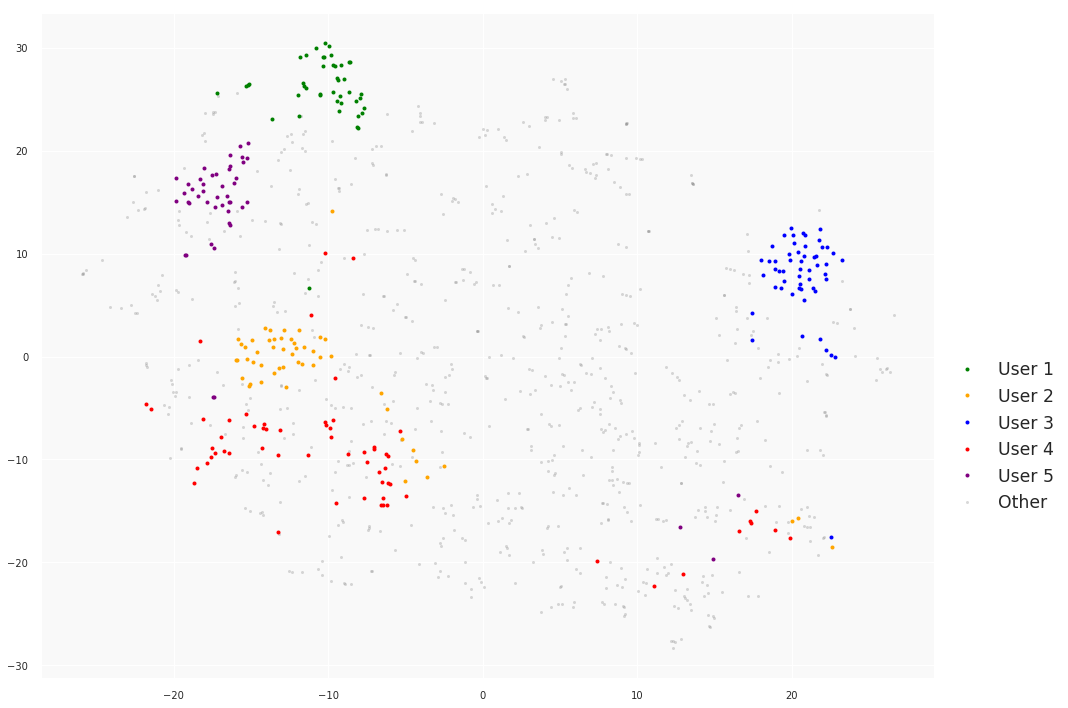

In [64]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'small',
          'ytick.labelsize': 'small'}
pylab.rcParams.update(params)
colors = ['green', 'orange', 'blue', 'red', 'purple']

data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x0', 'x1', 'class'])

known_classes = np.unique(y)
known_classes = known_classes[known_classes > 0]

neg_df = viz_df[viz_df['class'] == 0]
plt.plot('x0', 'x1', data=neg_df, linestyle='', marker='o', markersize=3, color="grey", alpha=0.3)
unknown, = plt.plot([], [], linestyle='', marker='o', markersize=3, color="grey", alpha=0.3)
legend = []
labels = []

for idx, i in enumerate(known_classes):
    curr_df = viz_df[viz_df['class'] == i]
    color = colors[idx]
    plt.plot('x0', 'x1', data=curr_df, linestyle='', marker='o', markersize=4, color=color, alpha=1)
    known,   = plt.plot([], [], linestyle='', marker='o', markersize=4, color=color, alpha=1)
    legend.append(known)
    labels.append('User {}'.format(i),)
    
legend.append(unknown)
labels.append('Other')

# plt.subplots_adjust(right=0.95)
# fig.legend((known, unknown, curr), ('Known samples', 'Unknown samples', 'Current user'), loc='center right', fancybox=True)
plt.legend(legend, labels, bbox_to_anchor=(1, 0.5), fancybox=True)
plt.tight_layout()
# fig.savefig('./users' + str(i) + '.pdf', format='pdf')
plt.savefig('./users_59.pdf', format='pdf')

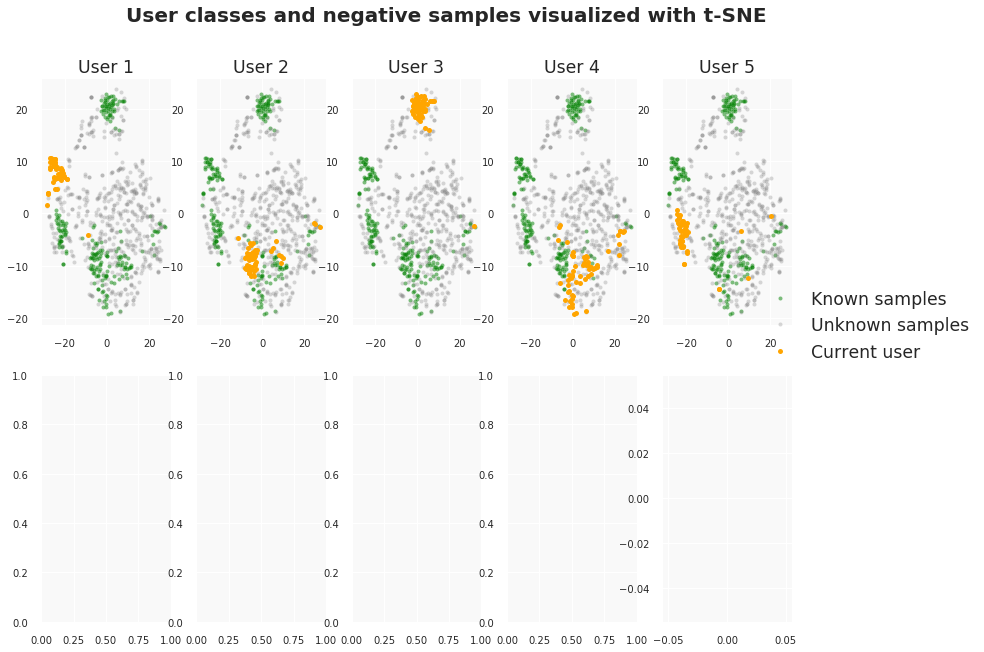

In [104]:
y = y_full
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'small',
          'ytick.labelsize': 'small'}
pylab.rcParams.update(params)

data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x0', 'x1', 'class'])

known_classes = np.unique(y)
known_classes = known_classes[known_classes > 0]

fig, axes = plt.subplots(nrows=2, ncols=5)
fig.suptitle('User classes and negative samples visualized with t-SNE', fontsize=20, fontweight='bold')

for i in known_classes:
    neg_df = viz_df[viz_df['class'] == 0]
    pos_df = viz_df[(viz_df['class'] != 0) & (viz_df['class'] != i)]
    curr_df = viz_df[viz_df['class'] == i]
    label = 'User {}'.format(i)

    ax = axes[int((i-1) / 5), (i-1) % 5]
    ax.plot('x0', 'x1', data=pos_df, linestyle='', marker='o', markersize=4, color="green", alpha=0.5)
    ax.plot('x0', 'x1', data=neg_df, linestyle='', marker='o', markersize=4, color="grey", alpha=0.3)
    ax.plot('x0', 'x1', data=curr_df, linestyle='', marker='o', markersize=5, color="orange")
    ax.set_title(label)

known,   = plt.plot([], [], linestyle='', marker='o', markersize=4, color='green', alpha=0.5)
unknown, = plt.plot([], [], linestyle='', marker='o', markersize=4, color="grey", alpha=0.3)
curr,    = plt.plot([], [], linestyle='', marker='o', markersize=5, color="orange")
plt.subplots_adjust(right=0.82)
fig.legend((known, unknown, curr), ('Known samples', 'Unknown samples', 'Current user'), loc='center right', fancybox=True)

plt.savefig('./users.pdf', format='pdf')

In [ ]:
data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])

fg = sns.FacetGrid(data=viz_df, hue='class', hue_order=np.unique(y), aspect=1.5, height=10)
fg.map(plt.scatter, 'x', 'y').add_legend()

## Raw data

In [65]:
def get_raw_csv(session):
    return 'zju_raw_session_' + str(session) + '_128.csv'

In [66]:
df_s0_128 = scale_df(pd.read_csv(BASE_FOLDER.joinpath(Path(get_raw_csv(0))), sep='\t'))
df_s1_128 = scale_df(pd.read_csv(BASE_FOLDER.joinpath(Path(get_raw_csv(1))), sep='\t'))
df_s2_128 = scale_df(pd.read_csv(BASE_FOLDER.joinpath(Path(get_raw_csv(2))), sep='\t'))

In [67]:
df_s0_128.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
0,0.707523,0.859628,0.859701,1.166384,1.473252,1.498443,1.331445,1.183790,1.192379,0.896460,...,-0.284781,-0.285794,-0.104945,0.216132,0.201476,0.193668,0.203853,0.376938,0.384800,10.0
1,-0.203686,-0.352010,-0.482800,-0.474925,-0.477679,-0.639410,-0.662795,-0.657301,-0.678158,-0.679470,...,-0.118439,0.388387,2.412540,2.357937,2.335025,2.346310,2.355189,0.715576,-0.122181,10.0
2,0.251918,0.405264,0.561367,0.569545,0.572823,0.429517,0.257623,0.109820,-0.210524,-0.521877,...,-0.451122,-0.454339,-0.440610,-0.607639,-0.455001,-0.468684,-0.127122,-0.131019,-0.291175,10.0
3,0.100050,0.102354,-1.079467,-1.071764,-1.228037,-0.028595,-0.049183,-0.197028,-0.210524,-0.521877,...,0.380585,0.219842,0.062887,-0.278130,-0.290882,-0.634272,-0.623584,-1.485571,-1.643125,10.0
4,-0.051818,0.253809,0.263034,0.271125,-0.027464,-0.334003,-0.816199,-0.657301,-0.210524,-0.206691,...,0.713267,0.725478,0.734216,0.710395,0.693833,0.690431,0.700315,0.715576,0.553794,10.0


In [68]:
select_classes = range(1, 6)
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
y = df[df.columns[-1]].values
y = LabelEncoder().fit_transform(y) + 1
X = df.drop([df.columns[-1]], axis=1)

select_classes = range(6, 154)
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
df = df.sample(n=X.shape[0] * NEG_RATE, random_state=RANDOM_STATE)
y_neg = np.zeros((X.shape[0] * NEG_RATE,))
X_neg = df.drop([df.columns[-1]], axis=1)

X_full = np.concatenate((X, X_neg), axis=0)
y_full = np.concatenate((y, y_neg), axis=0).astype(int)

In [69]:
X_full.shape

(1032, 384)

In [70]:
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [71]:
from MulticoreTSNE import MulticoreTSNE as TSNE
X_2d = TSNE(n_jobs=8, random_state=RANDOM_STATE, verbose=2, learning_rate=1000.0, early_exaggeration=4.0).fit_transform(X_full)

Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 103 of 1032
 - point 206 of 1032
 - point 309 of 1032
 - point 412 of 1032
 - point 515 of 1032
 - point 618 of 1032
 - point 721 of 1032
 - point 824 of 1032
 - point 927 of 1032
 - point 1030 of 1032
Done in 0.00 seconds (sparsity = 0.126253)!
Learning embedding...
Iteration 51: error is 15.100806 (50 iterations in 0.00 seconds)
Iteration 101: error is 15.102042 (50 iterations in 1.00 seconds)
Iteration 151: error is 15.102069 (50 iterations in 0.00 seconds)
Iteration 201: error is 15.087048 (50 iterations in 0.00 seconds)
Iteration 251: error is 15.094903 (50 iterations in 0.00 seconds)
Iteration 301: error is 1.165315 (50 iterations in 1.00 seconds)
Iteration 351: error is 1.114064 (50 iterations in 0.00 seconds)
Iteration 401: error is 1.099355 (50 iterations in 0.00 seconds)
Iteration 451: error is 1.089117 (50 iterations in 0.0

In [72]:
X_2d.shape, y_full.shape

((1032, 2), (1032,))

In [73]:
y = y_full.copy()

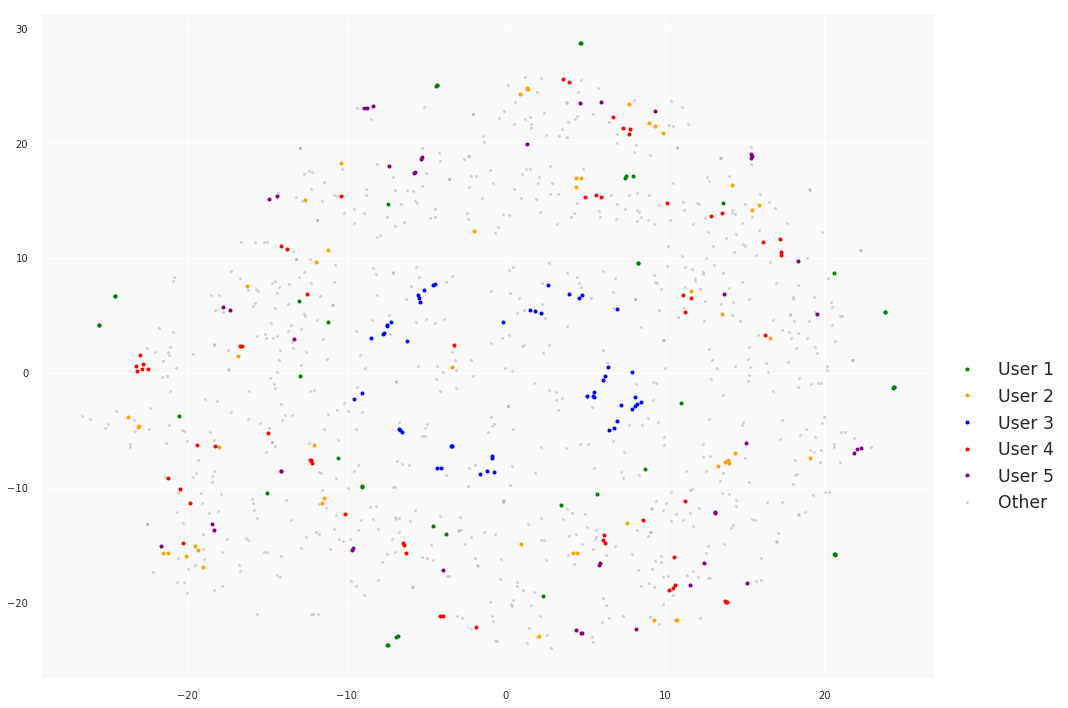

In [74]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'small',
          'ytick.labelsize': 'small'}
pylab.rcParams.update(params)
colors = ['green', 'orange', 'blue', 'red', 'purple']

data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x0', 'x1', 'class'])

known_classes = np.unique(y)
known_classes = known_classes[known_classes > 0]

neg_df = viz_df[viz_df['class'] == 0]
plt.plot('x0', 'x1', data=neg_df, linestyle='', marker='o', markersize=3, color="grey", alpha=0.3)
unknown, = plt.plot([], [], linestyle='', marker='o', markersize=3, color="grey", alpha=0.3)
legend = []
labels = []

for idx, i in enumerate(known_classes):
    curr_df = viz_df[viz_df['class'] == i]
    color = colors[idx]
    plt.plot('x0', 'x1', data=curr_df, linestyle='', marker='o', markersize=4, color=color, alpha=1)
    known,   = plt.plot([], [], linestyle='', marker='o', markersize=4, color=color, alpha=1)
    legend.append(known)
    labels.append('User {}'.format(i),)
    
legend.append(unknown)
labels.append('Other')

# plt.subplots_adjust(right=0.95)
# fig.legend((known, unknown, curr), ('Known samples', 'Unknown samples', 'Current user'), loc='center right', fancybox=True)
plt.legend(legend, labels, bbox_to_anchor=(1, 0.5), fancybox=True)
plt.tight_layout()
# fig.savefig('./users' + str(i) + '.pdf', format='pdf')
plt.savefig('./users_raw.pdf', format='pdf')

## Dense autoencoder

In [87]:
df_s0_128 = pd.read_csv(BASE_FOLDER.joinpath(Path('')), sep='\t')
df_s1_128 = pd.read_csv(BASE_FOLDER.joinpath(Path('')), sep='\t')
df_s2_128 = pd.read_csv(BASE_FOLDER.joinpath(Path('')), sep='\t')

In [89]:
select_classes = range(1, 6)
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
y = df[df.columns[-1]].values
y = LabelEncoder().fit_transform(y) + 1
X = df.drop([df.columns[-1]], axis=1)

select_classes = range(6, 154)
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
df = df.sample(n=X.shape[0] * NEG_RATE, random_state=RANDOM_STATE)
y_neg = np.zeros((X.shape[0] * NEG_RATE,))
X_neg = df.drop([df.columns[-1]], axis=1)

X_full = np.concatenate((X, X_neg), axis=0)
y_full = np.concatenate((y, y_neg), axis=0).astype(int)

In [75]:
from MulticoreTSNE import MulticoreTSNE as TSNE
X_2d = TSNE(n_jobs=8, random_state=RANDOM_STATE, verbose=2).fit_transform(X_full_train)

NameError: name 'X_full_train' is not defined